In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [4]:
#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [5]:
#Carga los datos. Antes de iniciar a cargar los datos renombramos las columnas que tienen espacios en blanco.
rawdata = pd.read_csv(r"C:\XTOL\Course5\task3\default of credit card clients.csv", header =1)

In [6]:
rawdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
##PReprocesar la data
rawdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
#datos que no necesitamos
del rawdata['ID']

In [9]:
print("El data set contiene columnas de los siguientes tipos: \n" +str(rawdata.dtypes))

El data set contiene columnas de los siguientes tipos: 
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object


In [10]:
print("El data set contiene los siguientes registros por columna e indica si tiene valores nulos: \n " +str(rawdata.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [11]:
#Cambiamos el nombre de la variable por uno más corto
rawdata = rawdata.rename(columns={'default_payment_next_month': 'Default_Payment'})

In [12]:
header = rawdata.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Payment'],
      dtype='object')


In [13]:
features = rawdata.iloc[:,0:18]

In [14]:
#dependent variable
depVar = rawdata['Default_Payment']

In [15]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
# Dividimos el conjunto de datos de validación y entrenamiento
test_size = 0.30
seed = 1106
X_train, X_validation, Y_train, Y_validation = train_test_split(features, depVar, test_size=test_size, random_state=seed, shuffle=True)

In [17]:
#Construir los modelos
#utilizaremos 10-fold cross validation para estimar la precisión del modelo.

# Algoritmos de comprobación
models = []
models.append(('RF', RandomForestClassifier(bootstrap=True, max_depth=10, 
                                 n_estimators=10, n_jobs=10)))
models.append(('GBM',GradientBoostingClassifier(max_depth=4, n_estimators=100,
                           verbose=1)))
models.append(('SVM', SVC(C=1.0, cache_size=400, degree=5,
    verbose=True)))

In [18]:
#Evaluación de Modelos
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.817667 (0.004653)
      Iter       Train Loss   Remaining Time 
         1           1.0120            4.87s
         2           0.9834            4.87s
         3           0.9612            4.80s
         4           0.9437            4.72s
         5           0.9286            4.70s
         6           0.9168            4.61s
         7           0.9064            4.59s
         8           0.8983            4.53s
         9           0.8904            4.55s
        10           0.8840            4.51s
        20           0.8510            4.06s
        30           0.8365            3.53s
        40           0.8268            3.00s
        50           0.8191            2.49s
        60           0.8131            1.99s
        70           0.8073            1.49s
        80           0.8019            1.00s
        90           0.7972            0.50s
       100           0.7928            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0108  

         4           0.9435            4.62s
         5           0.9291            4.60s
         6           0.9173            4.55s
         7           0.9077            4.50s
         8           0.8986            4.45s
         9           0.8910            4.43s
        10           0.8847            4.38s
        20           0.8527            3.89s
        30           0.8376            3.39s
        40           0.8280            2.92s
        50           0.8193            2.44s
        60           0.8128            1.95s
        70           0.8076            1.47s
        80           0.8026            0.98s
        90           0.7977            0.49s
       100           0.7918            0.00s
GBM: 0.820143 (0.005488)
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]SVM: 0.781190 (0.000238)


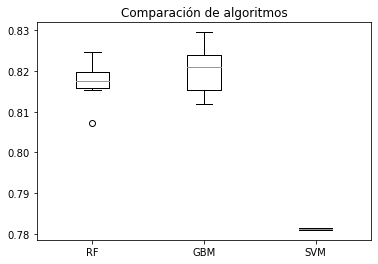

In [19]:
#comparar algoritmos
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

In [22]:
#Hacer predicciones sobre el conjunto de datos de validación
model = GradientBoostingClassifier()
clf= model.fit(X_train, Y_train)
predictions =clf.predict(X_validation)

In [23]:
#Evalución de predicción
print(accuracy_score(Y_validation, predictions))

0.82


In [24]:
model_score = clf.score(X_validation, Y_validation)
print ("Model Score %.2f \n" % (model_score))


Model Score 0.82 



In [25]:
print(classification_report(Y_validation, predictions, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      6959
     Default       0.70      0.36      0.48      2041

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [26]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_validation, predictions)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")


Confusion Matrix  [[6640  319]
 [1301  740]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 6640 | 319 |
Actual   |-----|-----|
       1 | 1301 | 740 |
         |-----|-----|


In [27]:
exactitud = accuracy_score(Y_validation, predictions)
precision = precision_score(Y_validation, predictions)
sensibilidad = recall_score(Y_validation, predictions)

print('Exactitud: %.3f' % exactitud)
print('Precision: %.3f' % precision)
print('Sensibilidad: %.3f' % sensibilidad)

Exactitud: 0.820
Precision: 0.699
Sensibilidad: 0.363
